In [1]:
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
cancer=pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/brest_cancer.csv', sep=',')

In [3]:
cancer.head()

,id,clump_thickness,unif_cell_size,unif_cell_shape,marginal_adhesion,single_epith_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


 **DATA MANIPULATION**

In [4]:
cancer.isnull().sum()

id                        0
clump_thickness           0
unif_cell_size            0
unif_cell_shape           0
marginal_adhesion         0
single_epith_cell_size    0
bare_nuclei               0
bland_chromatin           0
normal_nucleoli           0
mitoses                   0
class                     0
dtype: int64

In [5]:
 cancer.replace('?', np.nan,inplace=True)

In [6]:
 cancer.head(25)

,id,clump_thickness,unif_cell_size,unif_cell_shape,marginal_adhesion,single_epith_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [7]:
 cancer.isnull().sum().sort_values()

id                         0
clump_thickness            0
unif_cell_size             0
unif_cell_shape            0
marginal_adhesion          0
single_epith_cell_size     0
bland_chromatin            0
normal_nucleoli            0
mitoses                    0
class                      0
bare_nuclei               16
dtype: int64

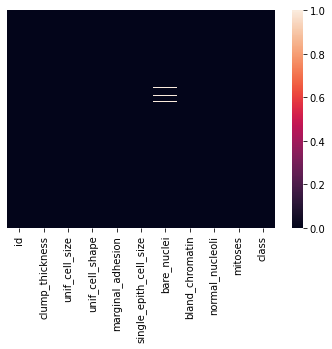

In [8]:
sns.heatmap(cancer.isnull(), yticklabels=False)

In [9]:
 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

In [10]:
cancer_array = imputer.fit_transform(cancer)

In [11]:
cancer_df = pd.DataFrame(cancer_array, columns=cancer.columns)

In [16]:
cancer_df

,id,clump_thickness,unif_cell_size,unif_cell_shape,marginal_adhesion,single_epith_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,1002945.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,1015425.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,1016277.0,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,1017023.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
694,776715.0,3.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,2.0
695,841769.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0
696,888820.0,5.0,10.0,10.0,3.0,7.0,3.0,8.0,10.0,2.0,4.0
697,897471.0,4.0,8.0,6.0,4.0,3.0,4.0,10.0,6.0,1.0,4.0


In [17]:
cancer_df.isnull().sum()

id                        0
clump_thickness           0
unif_cell_size            0
unif_cell_shape           0
marginal_adhesion         0
single_epith_cell_size    0
bare_nuclei               0
bland_chromatin           0
normal_nucleoli           0
mitoses                   0
class                     0
dtype: int64

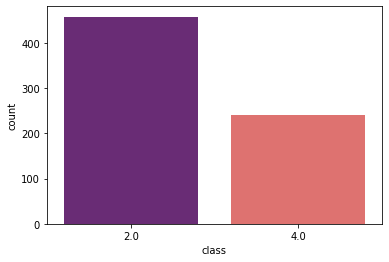

In [18]:
 sns.countplot(x = cancer_df['class'], palette='magma')

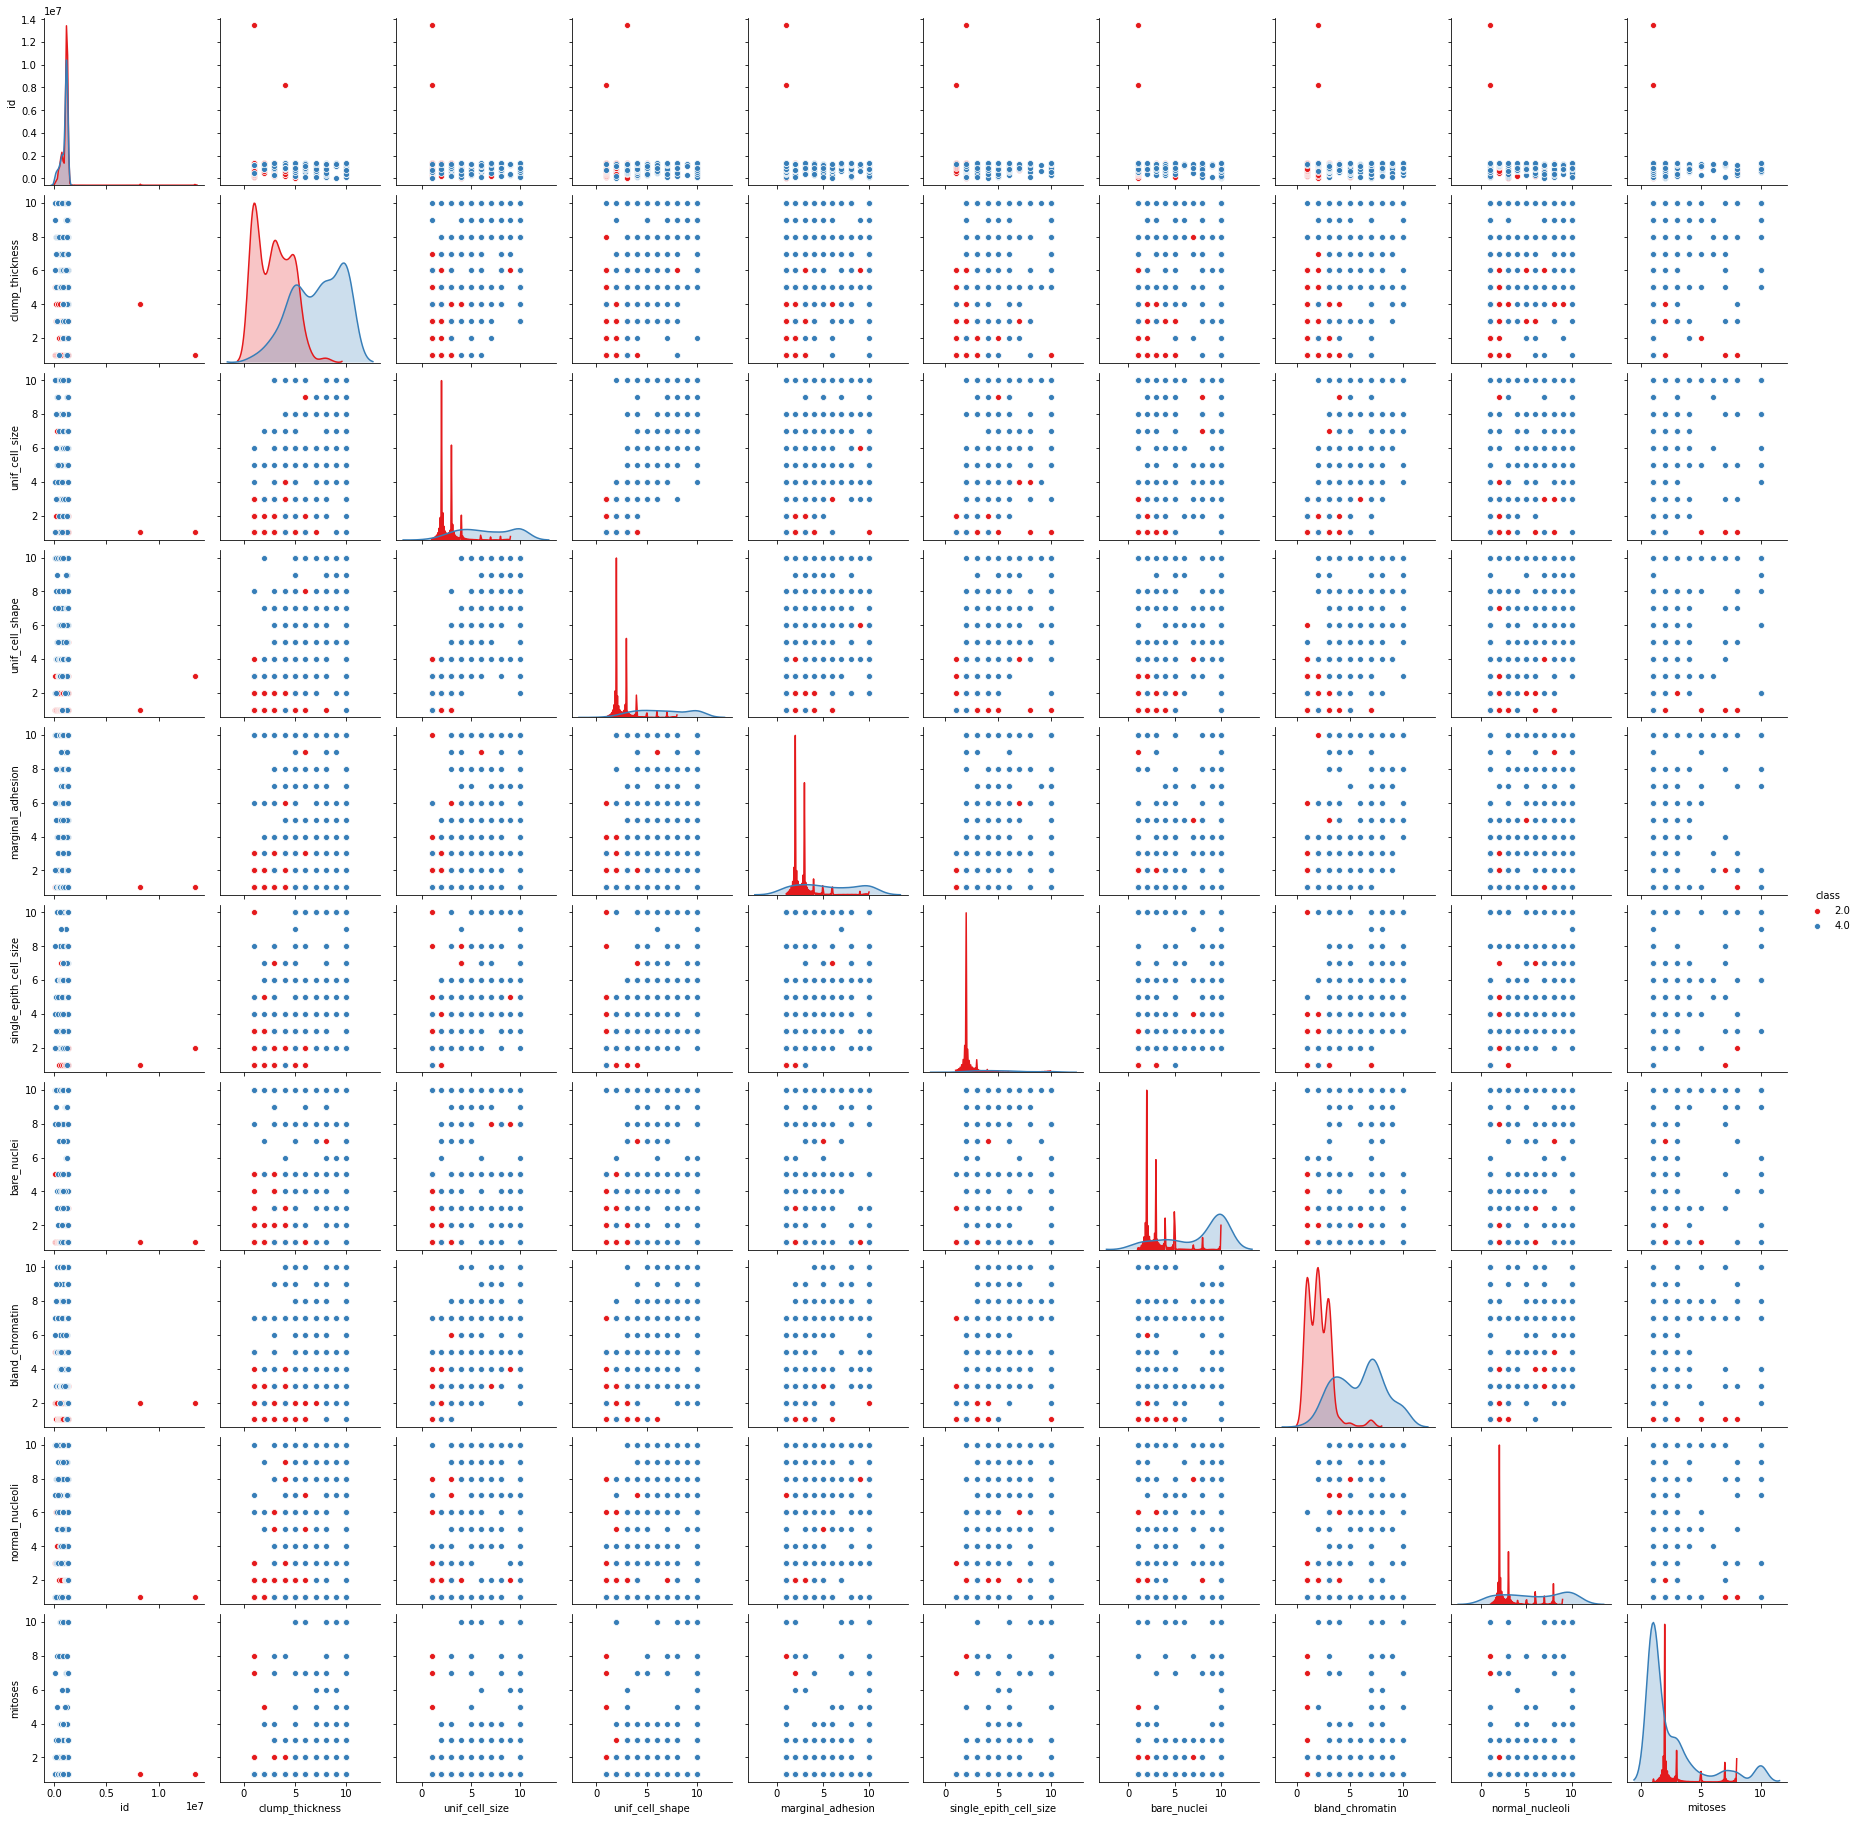

In [19]:
 sns.pairplot(cancer_df, hue = 'class', palette = 'Set1')

In [20]:
cancer_df['class'] = cancer['class']

In [21]:
cancer_df

,id,clump_thickness,unif_cell_size,unif_cell_shape,marginal_adhesion,single_epith_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2
1,1002945.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2
2,1015425.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2
3,1016277.0,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2
4,1017023.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715.0,3.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,2
695,841769.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2
696,888820.0,5.0,10.0,10.0,3.0,7.0,3.0,8.0,10.0,2.0,4
697,897471.0,4.0,8.0,6.0,4.0,3.0,4.0,10.0,6.0,1.0,4


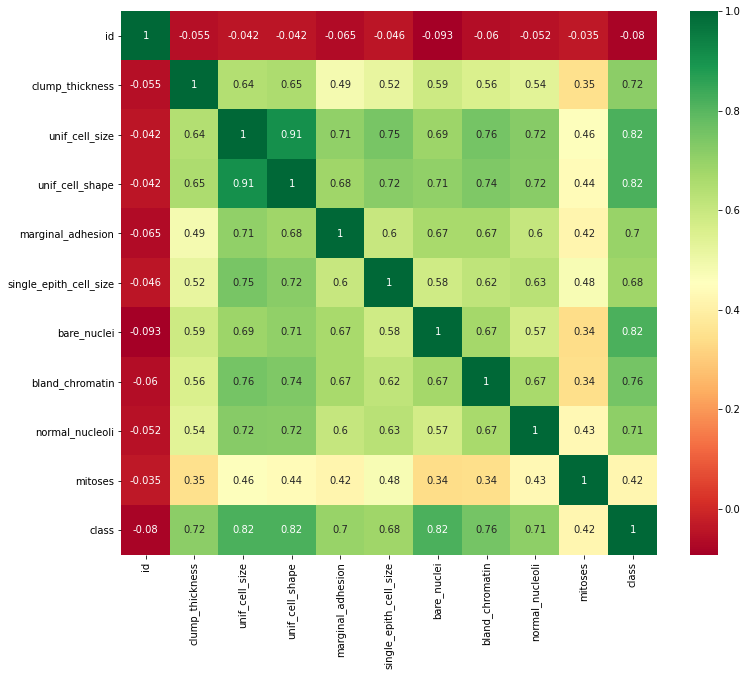

In [22]:
 
plt.figure(figsize=(12,10))
sns.heatmap(cancer_df.corr(), annot=True, cmap ='RdYlGn')

In [23]:
 X = cancer_df.drop(['class'], axis = 1)

In [24]:
Y = cancer_df['class']

 **Splitting into Train & Test**

In [111]:
 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

**How To Choose K**

In [112]:
 
from sklearn.neighbors import KNeighborsClassifier
 
test_score = []
train_score = []
 
for i in range(1, 21):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train, Y_train)
  train_score.append(knn.score(X_train, Y_train))
  test_score.append(knn.score(X_test, Y_test))

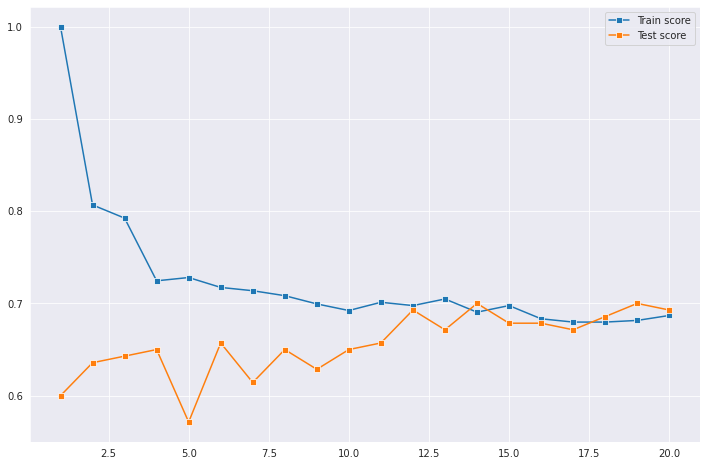

In [113]:
 
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.lineplot(range(1,21), train_score, label = 'Train score', marker = 's')
sns.lineplot(range(1,21), test_score, label = 'Test score', marker = 's')

 **Final Algorithm with K = 14**

In [114]:
 
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='uniform')

In [115]:
 knn.score(X_test, Y_test)

0.7

**Classificatin Metrics**

In [116]:
 ypred = knn.predict(X_test)

In [117]:
 
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, ypred)

array([[87,  5],
       [37, 11]])

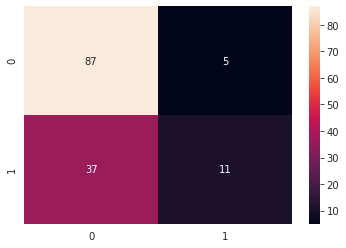

In [118]:
 sns.heatmap(confusion_matrix(Y_test, ypred), annot=True)

**Precision**

In [119]:
 
from sklearn.metrics import classification_report
print(classification_report(Y_test, ypred))

              precision    recall  f1-score   support

           2       0.70      0.95      0.81        92
           4       0.69      0.23      0.34        48

    accuracy                           0.70       140
   macro avg       0.69      0.59      0.57       140
weighted avg       0.70      0.70      0.65       140



**GridSearchCV**

In [120]:
 
# import GridSearchCV
from sklearn.model_selection import GridSearchCV
# In case of knn classifier the parameters to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv = 5)

In [121]:
 knn_cv.fit(X,Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [122]:
 knn_cv.best_params_

{'n_neighbors': 26}

In [123]:
 knn_cv.best_score_

0.608098663926002

In [124]:
 
knn = KNeighborsClassifier(n_neighbors=35)
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=35, p=2,
                     weights='uniform')

In [125]:
 knn.score(X_test, Y_test)

0.6785714285714286

In [126]:
 ypred = knn.predict(X_test)

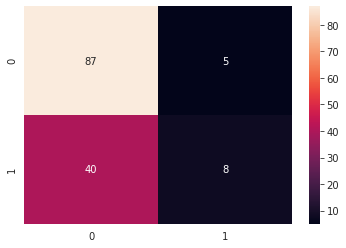

In [127]:
 sns.heatmap(confusion_matrix(Y_test, ypred), annot=True)